# Spirals data set

Exercise - Load and plot data
---

> **Exercise**: Load the data and plot the `x1` and `x2` variables. Use one color for each class.

In [1]:
import pandas as pd
import os

# Load data set
data_df = pd.read_csv(os.path.join('data', 'spirals.csv'))
data_df.head()

,x1,x2,y
0,-0.952,0.721,0
1,-0.842,0.130,1
2,-0.225,0.375,1
3,0.535,-1.408,0
4,-0.867,1.642,1


In [3]:
from sklearn.preprocessing import scale

# Create X/y arrays
X = scale(data_df.drop('y', axis=1).values) # Rescale input data
y = data_df.y.values

print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)

X: (2000, 2) float64
y: (2000,) int64


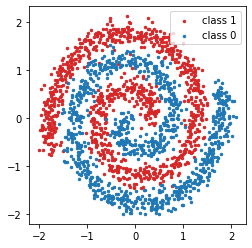

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create figure
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box') # same scale for x- and y-axis

# Plot data
class1_idx = (y == 1) # Points from class 1
ax.scatter(X[:, 0][class1_idx], X[:, 1][class1_idx], label='class 1', color='C3', s=6)
ax.scatter(X[:, 0][~class1_idx], X[:, 1][~class1_idx], label='class 0', color='C0', s=6)
ax.legend()
plt.show()

Exercise - Compare classifiers
---

> **Exercise**: Fit the following classifiers and plot them using the `decision_surface()` function from the course.
> * Logistic regression
> * SVM with linear kernel
> * *k*-NN
> * Decision tree
> * Random forest
> * SVM with RBF kernel

Helper function from course
---

In [5]:
import numpy as np

# Helper function
def decision_surface(ax, x1, x2, y, estimator):
    # Same scale for x- and y-axis
    ax.set_aspect('equal', adjustable='box')

    # Plot data points
    class1_idx = (y == 1)
    plt.scatter(x1[class1_idx], x2[class1_idx], color='C3', label='class 1', s=6)
    plt.scatter(x1[~class1_idx], x2[~class1_idx], color='C0', label='class 0', s=6)

    # Create a grid of values
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    x_values = np.linspace(*xlim, num=500)
    y_values = np.linspace(*ylim, num=500)
    xx, yy = np.meshgrid(x_values, y_values)
    grid_points = np.c_[xx.flatten(), yy.flatten()]

    # Compute predictions
    preds = estimator.predict(grid_points)
    zz = preds.reshape(xx.shape)

    # Draw decision boundary
    plt.contour(xx, yy, zz, levels=[0.5], colors='gray')
    
    # Plot decision surface with level curves
    plt.contourf(xx, yy, zz, alpha=0.1, cmap=plt.cm.coolwarm)
    plt.legend()
    plt.show()

Logistic regression
---

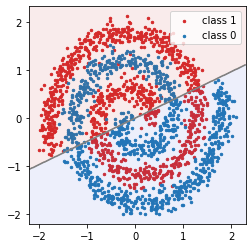

In [6]:
from sklearn.linear_model import LogisticRegression

# Logistic regression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X, y)
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, logreg)

Linear SVM
---

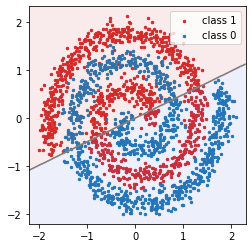

In [7]:
from sklearn.svm import LinearSVC

# SVM with linear kernel
linear_svc = LinearSVC(random_state=0)
linear_svc.fit(X, y)
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, linear_svc)

k-nearest neighbors
---

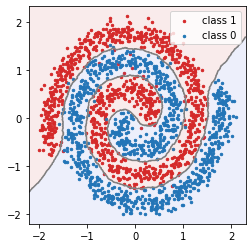

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X, y)
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, knn)

Decision trees
--

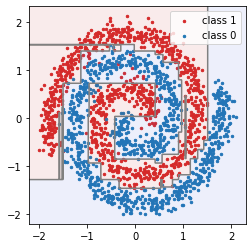

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree
dt = DecisionTreeClassifier(max_depth=10, random_state=0)
dt.fit(X, y)
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, dt)

Random forests
---

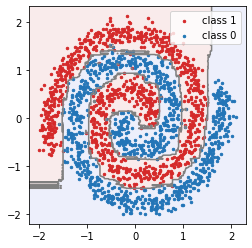

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Random forest
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
rf.fit(X, y)
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rf)

RBF SVM
---

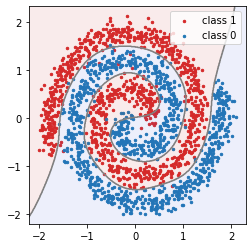

In [11]:
from sklearn.svm import SVC

# Random forest
rbf_svc = SVC(kernel='rbf', C=10, gamma=1, random_state=0)
rbf_svc.fit(X, y)
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rbf_svc)